In [1]:
import cv2
import random
import time
import numpy as np
from scipy import misc

from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline
plt.style.use('ggplot')

In [60]:
import os
import sys
sys.path.append('../common/')
import utils

In [3]:
dirs = os.listdir('../data/CASIA-WebFace/')

In [4]:
valid_dirs = random.sample(dirs,30)

In [5]:
valid_dirs = ['../data/CASIA-WebFace/{}'.format(x) for x in valid_dirs]

In [6]:
valid_dirs

['../data/CASIA-WebFace/3665937',
 '../data/CASIA-WebFace/0538261',
 '../data/CASIA-WebFace/0933959',
 '../data/CASIA-WebFace/1890655',
 '../data/CASIA-WebFace/0761078',
 '../data/CASIA-WebFace/2348805',
 '../data/CASIA-WebFace/2654199',
 '../data/CASIA-WebFace/0874232',
 '../data/CASIA-WebFace/5786096',
 '../data/CASIA-WebFace/1228007',
 '../data/CASIA-WebFace/3595501',
 '../data/CASIA-WebFace/0001307',
 '../data/CASIA-WebFace/0005308',
 '../data/CASIA-WebFace/1502511',
 '../data/CASIA-WebFace/0727810',
 '../data/CASIA-WebFace/1886805',
 '../data/CASIA-WebFace/0385639',
 '../data/CASIA-WebFace/0387521',
 '../data/CASIA-WebFace/1216253',
 '../data/CASIA-WebFace/0530249',
 '../data/CASIA-WebFace/0595485',
 '../data/CASIA-WebFace/3922289',
 '../data/CASIA-WebFace/0001617',
 '../data/CASIA-WebFace/0000916',
 '../data/CASIA-WebFace/0304629',
 '../data/CASIA-WebFace/1115889',
 '../data/CASIA-WebFace/0283311',
 '../data/CASIA-WebFace/4065744',
 '../data/CASIA-WebFace/0004809',
 '../data/CASI

In [7]:
picurls = []
for one_dir in valid_dirs:
    for one_file in os.listdir(one_dir):
        picurls.append("{}/{}".format(one_dir,one_file))

In [8]:
len(picurls)

1259

In [9]:
facecascade = cv2.CascadeClassifier('../data/haar_cascade_frontalface_default.xml')

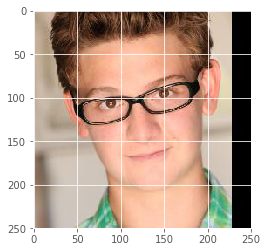

In [56]:
sample_image = misc.imread(picurls[19])
plt.imshow(sample_image)

In [57]:
x,y,w,h = facecascade.detectMultiScale(sample_image,scaleFactor=1.1,minNeighbors=5)[0]

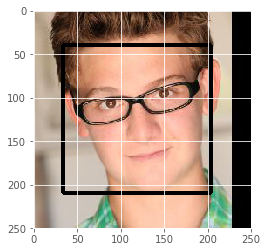

In [58]:
plt.imshow(cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,0),4))

In [73]:
failcount = 0
pb = utils.ProgressBar(worksum=len(picurls))
pb.startjob()

resultdic = {}

for one_url in picurls:
    one_img = misc.imread(one_url)
    try:
        x,y,w,h = facecascade.detectMultiScale(one_img,scaleFactor=1.1,minNeighbors=5)[0]
        xm = x + int(w / 2)
        ym = y + int(h / 2)
        resultdic[one_url] = (xm - 50,ym - 50,xm + 50,ym + 50)
        pb.complete(1)
    except:
        failcount += 1
        pb.complete(1)
        continue

 100.00 % [==================================================>] 1259/1259 	 used:22s eta:0 s

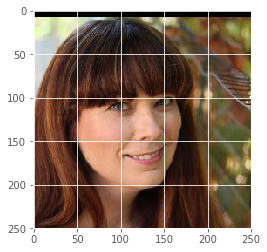

In [74]:
plt.imshow(one_img)

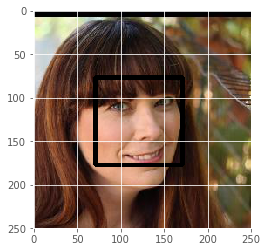

In [75]:
plt.imshow(cv2.rectangle(one_img,(xm-50,ym-50),(xm+50,ym+50),(0,0,0),4))

In [76]:
import pickle

In [77]:
with open('training_data.pkl','wb') as whdl:
    pickle.dump(resultdic,whdl)

In [78]:
resultdic

{'../data/CASIA-WebFace/3595501/147.jpg': (70, 71, 170, 171),
 '../data/CASIA-WebFace/3595501/099.jpg': (47, 29, 147, 129),
 '../data/CASIA-WebFace/0001617/024.jpg': (77, 74, 177, 174),
 '../data/CASIA-WebFace/0001617/042.jpg': (79, 75, 179, 175),
 '../data/CASIA-WebFace/1890655/018.jpg': (71, 75, 171, 175),
 '../data/CASIA-WebFace/0387521/010.jpg': (68, 75, 168, 175),
 '../data/CASIA-WebFace/0933959/019.jpg': (74, 74, 174, 174),
 '../data/CASIA-WebFace/1890655/005.jpg': (70, 71, 170, 171),
 '../data/CASIA-WebFace/0304629/023.jpg': (66, 75, 166, 175),
 '../data/CASIA-WebFace/0004809/066.jpg': (91, 80, 191, 180),
 '../data/CASIA-WebFace/3595501/169.jpg': (73, 69, 173, 169),
 '../data/CASIA-WebFace/3595501/211.jpg': (74, 77, 174, 177),
 '../data/CASIA-WebFace/1216253/009.jpg': (74, 74, 174, 174),
 '../data/CASIA-WebFace/3595501/079.jpg': (73, 76, 173, 176),
 '../data/CASIA-WebFace/0385639/009.jpg': (77, 76, 177, 176),
 '../data/CASIA-WebFace/0000916/006.jpg': (76, 77, 176, 177),
 '../dat